# Programming Cournot competition

In this notebook that we discuss in class, we solve a duopoly Cournot model using python. This illustrates how to optimize in python and how to solve equations to find an equilibrium.

To store the results of our simulations, we use the library `pandas`. You will learn more about `pandas` on datacamp. So do not worry if you do not understand all details in this notebook. But if you have any questions, feel free to ask them!



# Model



In this notebook we show how a Cournot model can be solved numerically.

We start by importing the relevant libraries, which now also includes `pandas`.

In [1]:
from scipy import optimize,arange
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We assume that (inverse) demand is linear:
$$
p_i(q_i,q_j) = 1-aq_i-bq_j
$$
where $0<b \leq a$.

Further, firms have constant marginal costs:
$$
c_i(q) = c_i q
$$
Then we can write profits as:
$$
\pi_i(q_i,q_j) = (p_i(q_i,q_j)-c_i)q_i
$$

We can define these functions in python as follows.

In [2]:
def p(q1,q2):
    return 1-a*q1-b*q2

def costs(q,c):
    return c*q

def profits(q1,q2,c):
    return p(q1,q2)*q1-costs(q1,c)

We assume that the firms produce perfect substitutes (homogenous goods).

In [3]:
a = 1
b = 1

In equilibrium,each firm maximizes its profits taking the output level of its competitor as given. This is how we are going to model firms. That is, we do not take first order conditions (see appendix for this approach); instead we maximize profits directly.

A minor problem here is that python does not feature maximization routines; there are only minimization routines. Hence, if we want to maximize profits, we need to minimize `minus profits`. In the following code block, we minimize $-profits$ for firm 1 given an output level $q_2$ for the other firm. This is, in fact, firm 1's reaction function. From `optimize` we use the function `fminbound` to find the minimum of $-profits$. We specify the function `profits`, with functions `p` and `costs` as defined above. The function call to `reaction` specifies `q2` and `c1`. The only variable left to vary is $q_1$ which we denote by $x$ in the "lambda"-function. Further, we specify the interval where the optimal $q_1$ has to be found; $[0,1]$ in this case. Google to see what `full_output` does in this case; or evaluate `optimize.fminbound?` in a cell.

Then we define the function `fixed_point`: each firm's output choice is optimal *given* the output of the other firm. Note that the function `reaction` can be used for both firm 1 and firm 2; only the arguments differ for the firms, but the function itself is the same.

The function `fixed_point` takes two (vector) arguments: a vector $q=[q_1,q_2]$ of output levels and $c=[c_1,c_2]$ of cost levels. With the indexing conventions in python, $q[0]$ is the first element of $q$ and hence a natural choice for $q_1$; similarly, $q[1]$ corresponds to $q_2$. The same logic applies to $c$.

From `optimize` (which was imported above from `scipy`), we use `fsolve` to find the $q$ where `fixed_point(q,c)` equals 0. We provide an initial guess for this vector $q$. We solve the model for the case where $c_1=c_2=0$.



In [4]:
def reaction(q2,c1):
    q1 =  optimize.fminbound(lambda x: -profits(x,q2,c1),0,1,full_output=1)
    return q1[0]

def fixed_point(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])]

initial_guess = [0,0]

optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

array([0.33333333, 0.33333333])

**a) [1 point]** Derive that total output equals 0.5 if $c_1=0.2$ and $c_2=0.3$.


In [5]:
initial_guess = [0,0]
optimize.fsolve(lambda q: fixed_point(q,[0.2,0.3]), initial_guess)


array([0.3, 0.2])

Now we are going to do a number of simulations for different cost levels of the two firms. In order to store all the outcomes of these simulations, we create a pandas dataframe. This is probably new to you, but do not worry, we will see more of pandas both in class and on datacamp.

We create lists for all the variables that we want to include in the dataframe. That is, we use for-loops for the costs of firm 1 and the costs of firm 2 (so that we get all the combinations of cost levels for firms 1 and 2).

We create empty lists for the variables `range_c1, range_c2, range_q1, range_q2` and for each simulation, we append the results to these lists. The next cell shows how this works in a simple example.


In [6]:
my_list = []
my_list.append(1)
my_list.append(8)
my_list

[1, 8]

If you understand the `append` method above, you can see the same happening in the next cell.

Note that running this cell will take a bit of time. You can see that the cell is running by the `In [*]` at the top-left of the cell after you press `SHIFT` and `ENTER`.

In [7]:
range_c = arange(0,0.51,0.01)
range_c1 = []
range_c2 = []
range_q1 = []
range_q2 = []

for i in range(len(range_c)):
    for j in range(len(range_c)):
        range_c1.append(range_c[i])
        range_c2.append(range_c[j])
        range_q1.append(optimize.fsolve(lambda q: fixed_point(q,[range_c[i],range_c[j]]), initial_guess)[0])
        range_q2.append(optimize.fsolve(lambda q: fixed_point(q,[range_c[i],range_c[j]]), initial_guess)[1])                

    

Now we can add all the lists that we created above to the dataframe `df_simulations`. We do this using the function `pd.DataFrame` which takes as its input a dictionary of the form: `{column_name_1:list_1,column_name_2:list_2, ...})`

In [8]:
df_simulations = pd.DataFrame({'c_1':range_c1,'c_2':range_c2,'q_1':range_q1,'q_2':range_q2})

To get an idea what the dataframe looks like, we can use `head` which gives the first 5 rows. If you want to see 10 rows, use `head(10)`.

In [9]:
df_simulations.head()

,c_1,c_2,q_1,q_2
0,0.0,0.00,0.333333,0.333333
1,0.0,0.01,0.336667,0.326667
2,0.0,0.02,0.340000,0.320000
3,0.0,0.03,0.343333,0.313333
4,0.0,0.04,0.346667,0.306667


We view the dataframe defined above as an economy with different sectors. In each sector there is a duopoly with firms with different costs. We will analyze this cross section of industries below. We start with some summary statistics of this economy.

**b) [1 point]** Use the pandas command that gives you the mean, median and quartiles. Use google to find this command or use `df_simulations.` and press TAB to see whether you can recognize such a command [hint: the command starts with the letter 'd'].

In [10]:
df_simulations.describe()

,c_1,c_2,q_1,q_2
count,2601.000000,2601.000000,2601.000000,2601.000000
mean,0.250000,0.250000,0.250000,0.250000
std,0.147224,0.147224,0.109735,0.109735
min,0.000000,0.000000,0.000006,0.000006
25%,0.120000,0.120000,0.166667,0.166667
50%,0.250000,0.250000,0.250000,0.250000
75%,0.380000,0.380000,0.333333,0.333333
max,0.500000,0.500000,0.499997,0.499997


Although, in pandas it is possible to plot from a dataframe directly, we will use `matplotlib` to plot our results.

The following command plots output of firm 2, $q_2$, against the cost of firm 2, $c_2$. 

**c) [1 point]** Add the command that plots $q_1$ against $c_2$ and copy/paste this into the next cell.


`plt.plot(df_simulations[df_simulations.c_1==0].c_2,df_simulations[df_simulations.c_1==0].q_2,label='$q_2$')
plt.legend()
plt.xlabel('$c_2$')
plt.ylabel('$q$')`

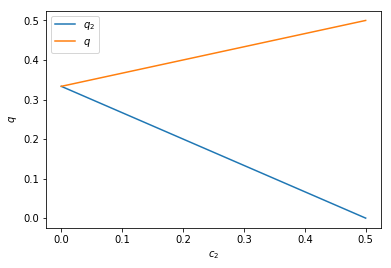

In [11]:
plt.plot(df_simulations[df_simulations.c_1==0].c_2,df_simulations[df_simulations.c_1==0].q_2,label='$q_2$')
plt.plot(df_simulations[df_simulations.c_1==0].c_2,df_simulations[df_simulations.c_1==0].q_1,label='$q$')
plt.legend()
plt.xlabel('$c_2$')
plt.ylabel('$q$')

**d) [1 point]** Why is $q_1$ increasing in this graph and $q_2$ decreasing?

YOUR ANSWER HERE

Once we have a dataframe, we can calculate new variables using the columns in the existing dataframe. For instance, to add a column with total output, we do the following:

In [12]:
df_simulations['Q'] = df_simulations['q_1']+df_simulations['q_2']


**e) [1 point]** Calculate equilibrium prices. That is, define the new column `df_simulations['P']`.

In [13]:
df_simulations['P'] = 1- df_simulations['Q']


**f) [1 point]** Include the profits of firm 1 and firm 2 in the dataframe. Denote these columns 'Profits_1', 'Profits_2'.

In [14]:
df_simulations['Profits_1'] = df_simulations['P'] - df_simulations['c_1']*df_simulations['q_1']
df_simulations['Profits_2'] = df_simulations['P'] - df_simulations['c_2']*df_simulations['q_2']


A popular competition measure is the Herfindahl index. The equation for this index is given by
$$
H = \sum_{i=1}^n \left(\frac{q_i}{\sum_{j=1}^n q_j} \right)^2
$$
where $\frac{q_i}{\sum_{j=1}^n q_j}$ gives the market share of firm $i$ in a market with $n$ firms (and homogenous products).

In words, the Herfindahl index equals the sum of firms' squared market shares.

For our duopoly model, we can write
$$
H = \left( \frac{q_1}{Q} \right)^2 + \left( \frac{q_2}{Q} \right)^2
$$
where total market ouput is given by $Q=q_1+q_2$.

Lower values of $H$ are often seen as indicating more intense competition in a market. Indeed, if there is a monopoly in a market, one firm has market share equal to 1 and all other firms have market share equal to 0. Then we have $H=1$. Instead, in a duopoly market with symmetric firms we have $H = 0.5$.

Hence, the closer $H$ is to 0.5, the more competitive the duopoly market according to this reasoning.

**g) [1 point]** Add the Herfindahl index to the dataframe. That is, add the column `df_simulations['H']`.

In [15]:
df_simulations['H']= df_simulations['q_1']/df_simulations['Q']**2+df_simulations['q_2']/df_simulations['Q']**2

Once you have added $H$ to the dataframe, we can make a scatter plot of $H$ against $P$. Each point (dot) in this plot is an industry in our economy in the dataframe.

Above we explained why people tend to interpret low $H$ as a competitive industry. Another interpretation of a competitive industry is, of course, that its price is low.

**h) [1 point]** Plot `df_simulations['H']` against `df_simulations['P']`. Add the label $H$ to the horizontal axis and $P$ to the vertical axis.

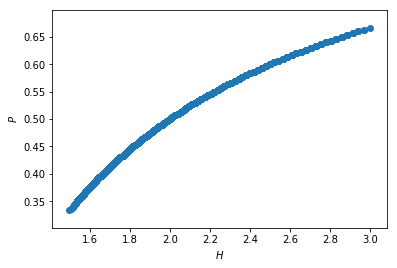

In [16]:
plt.scatter(df_simulations['H'],df_simulations['P'])
plt.xlabel('$H$')
plt.ylabel('$P$')
plt.show()

YOUR ANSWER HERE

**i) [1 point]** Use this figure above to discuss the role of the Herfindahl index as a competition measure. Do you agree with the interpretation that lower $H$ should be interpreted as more competitive?

YOUR ANSWER HERE

**j) [1 point]** Copy/paste the code under c) where we plot $q_1,q_2$ against $c_2$. Make the following adjustments:

1. select the rows in the dataframe where $c_1 = 0.2$ (instead of 0.0);
2. plot $H$ against $c_2$
3. plot $Q$ against $c_2$



In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**k) [1 point]** Use this graph to explain the intuition for the relation between $H$ and $P$.

YOUR ANSWER HERE

## Appendix

The model we solve above is actually simple enough to solve analytically. In case you are wondering, this appendix shows how to solve the model. This appendix is optional; you do not need to read it for the course.


Assume we have a linear demand curve $p_i(q_i,q_j)=1-a q_i - b q_j$ and costs $c_i(q)=c_i q$, where $q_i$ denotes firm $i$'s output on the market.

Firm $i$'s profit is written as $\pi(q_i,q_j)=(1-a q_i-b q_j)q_i-c_i q_i$ with $j \neq i$.

The two first order conditions for firms 1 and 2 are derive by taking the derivative of $\pi_1$ w.r.t. $q_1$ and $\pi_2$ w.r.t. $q_2$. These equations can be written as:
$$
1-2a q_1-b q_2-c_1 = 0
$$
and
$$
1-2 a q_2-b q_1-c_2 = 0
$$

Then we can solve these two equations in the unknowns $q_1,q_2$. However, we usually take a step in between and define the reaction functions. That is, we solve the optimal $q_i$ as a function of $q_j$:
$$
q_i = \frac{1}{2a}(1-c_i-b q_j)
$$
Or, equivalently, we define $i$'s reaction function as 
$$
R_i(q_j) = \frac{1}{2a}(1-c_i-b q_j)
$$

We have an equilibrium if $q_1 = R_1(q_2)$ and $q_2 = R_2(q_1)$. Or in matrix notation, the equilibrium is given by $q_1,q_2$ such that
$$
\begin{pmatrix} q_1\\ q_2\end{pmatrix} = \begin{pmatrix} R_1(q_2)\\ R_2(q_1)\end{pmatrix}
$$

If both firms have the same costs $c_1=c_2$, there is a symmetric equilibrium given by $q=R(q)$.

To calculate the equilibrium, we need to find a so called fixed point of the vector function $R(q)$. This can be seen as follows.

Define the function (or mapping) $q \rightarrow R(q)$ with $q \in \Re^2$ and 

$$
R(q) = \begin{pmatrix} R_1(q_2)\\ R_2(q_1)\end{pmatrix}
$$

A fixed point of this function is defined as a vector $q$ such that $q=R(q)$. In words, $q_1$ is the optimal reaction to $q_2$ and $q_2$ is the optimal reaction to $q_1$. That is, the vector $q$ is a Nash equilibrium. Each firm $i$ chooses its optimal output level $q_i$, given the choice by the other firm $q_j$.
